# <a id='step1'></a>
# <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b><b></span><span style="color:white"><b>Fruits and Vegetables Recognition System</b></span></div>

## <a id='step11'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 1.1 | <b></span><span style="color:#368F8B"><b>Import libraries</b></span></span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers

## <a id='step21'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b><b></span><span style="color:#368F8B"><b>Data</b></span></span>

## <a id='step21'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.1 | <b></span><span style="color:#368F8B"><b>Import Data</b></span></span>

In [3]:
# Get the helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-14 19:31:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-14 19:31:26 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from google.colab import files
uploaded  = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [5]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:27<00:00, 88.9MB/s]
100% 1.98G/1.98G [00:28<00:00, 76.0MB/s]


In [6]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

unzip_data('fruit-and-vegetable-image-recognition.zip')

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


In [8]:
len(class_names)

36

## <a id='step22'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.2 | <b></span><span style="color:#368F8B"><b>Data Visualization</b></span></span>

In [9]:
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (491, 540, 4)
Image shape: (1302, 1500, 4)
Image shape: (1071, 1600, 3)
Image shape: (425, 425, 3)
Image shape: (448, 458, 3)
Image shape: (842, 1028, 3)


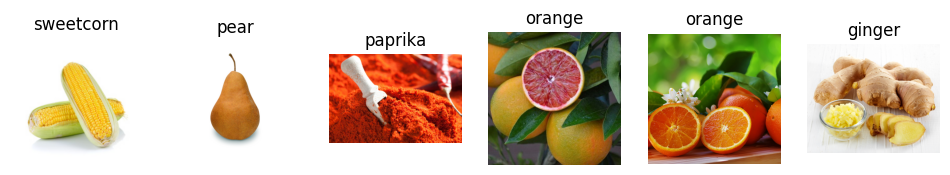

In [10]:
# View a random image from the training dataset
plt.figure(figsize = (12, 12))
plt.subplot(1, 6, 1)
img_1 = view_random_image("/content/train/", "sweetcorn")
plt.subplot(1, 6, 2)
img_2 = view_random_image("/content/train/", "pear")
plt.subplot(1, 6, 3)
img_3 = view_random_image("/content/train/", "paprika")
plt.subplot(1, 6, 4)
img_4 = view_random_image("/content/train/", "orange")
plt.subplot(1, 6, 5)
img_5 = view_random_image("/content/train/", "orange")
plt.subplot(1, 6, 6)
img_6 = view_random_image("/content/train/", "ginger")

## <a id='step22'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.3 | <b></span><span style="color:#368F8B"><b>Data Preprocessing</b></span></span>

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   # for data augmentation if need it
                                  #  rotation_range=20,              # Rorate images by factor 20 degree
                                  #  width_shift_range=0.2,          # Shift images horizontally by up to 20% of their width
                                  #  height_shift_range=0.2,         # Shift images vertically by up to 20% of their width
                                  #  zoom_range=0.1,                 # Zoom in and out images by 10%
                                  #  horizontal_flip=True,           # Allow horizontal flipping
                                  #  shear_range=0.1,                # shear images by 10% their size
                                  #  fill_mode='nearest'
                                   )
validation_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# training image preprocessing
training_set = train_datagen.flow_from_directory(
    "/content/train",
    class_mode = "categorical",
    color_mode = "rgb",
    batch_size = 32,
    target_size = (64, 64),
    shuffle = True,
    seed = 42
)
# validation image preprocessing
validation_set = validation_datagen.flow_from_directory(
    "/content/validation",
    class_mode = "categorical",
    color_mode = "rgb",
    batch_size = 32,
    target_size = (64, 64),
    shuffle = True,
    seed = 42
)
# testing imaeg preprocessing
testing_set = test_datagen.flow_from_directory(
    "/content/test",
    class_mode = "categorical",
    color_mode = "rgb",
    batch_size = 32,
    target_size = (64, 64),
    shuffle = True,
    seed = 42
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


# <a id='step3'></a>
# <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b><b></span><span style="color:white"><b>Modeling</b></span></div>

## <a id='step31'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1 | <b></span><span style="color:#368F8B"><b>Convolution Model</b></span></span>

In [ ]:
tf.random.set_seed(42)

# Create a simple CNN model
Model_1 = tf.keras.Sequential([
  layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = "relu", input_shape = [64, 64, 3]),
  layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"),
  layers.MaxPool2D(pool_size = 2, strides = 2),

  layers.Dropout(0.25),

  layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = 'same'),
  layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"),
  layers.MaxPool2D(pool_size = 2, strides = 2),

  layers.Dropout(0.25),

  layers.Flatten(),

  layers.Dense(units = 512, activation = "relu"),
  layers.Dense(units = 256, activation = "relu"),
  layers.Dropout(0.5),

  layers.Dense(units = len(class_names), activation = 'softmax')
])
Model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
Model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit the Model
Model_1_history = Model_1.fit(
    training_set,
    epochs = 40,
    validation_data = validation_set
    )

Epoch 1/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 861ms/step - accuracy: 0.0321 - loss: 3.6003 - val_accuracy: 0.0541 - val_loss: 3.5316
Epoch 2/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 749ms/step - accuracy: 0.0586 - loss: 3.4492 - val_accuracy: 0.0798 - val_loss: 3.1398
Epoch 3/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 775ms/step - accuracy: 0.0884 - loss: 3.2111 - val_accuracy: 0.1652 - val_loss: 2.7181
Epoch 4/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 761ms/step - accuracy: 0.1205 - loss: 3.0276 - val_accuracy: 0.2621 - val_loss: 2.3533
Epoch 5/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 776ms/step - accuracy: 0.1803 - loss: 2.6858 - val_accuracy: 0.3390 - val_loss: 2.1959
Epoch 6/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 760ms/step - accuracy: 0.2188 - loss: 2.5663 - val_accuracy: 0.3533 - val_loss: 1.9890
Epoch 7/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 879ms/step - accuracy: 0.2768 - loss: 2.3448 - val_accuracy: 0.4444 - val_loss: 1.7894
Epoch 8/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 757ms/step - accuracy: 0.3055 - loss: 2.2135 - val_accu

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1.1 | <b></span><span style="color:#368F8B"><b>Evaluation the Performance of the Convolution Model</b></span></span>

In [ ]:
train_loss, train_acc = Model_1.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 818ms/step - accuracy: 0.9908 - loss: 0.0209
Training accuracy: 0.9919742941856384


In [ ]:
val_loss, val_acc = Model_1.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9613 - loss: 0.1592
Validation accuracy: 0.9629629850387573


In [ ]:
test_loss, test_acc = Model_1.evaluate(testing_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 933ms/step - accuracy: 0.9535 - loss: 0.2040
Test accuracy: 0.9637883305549622


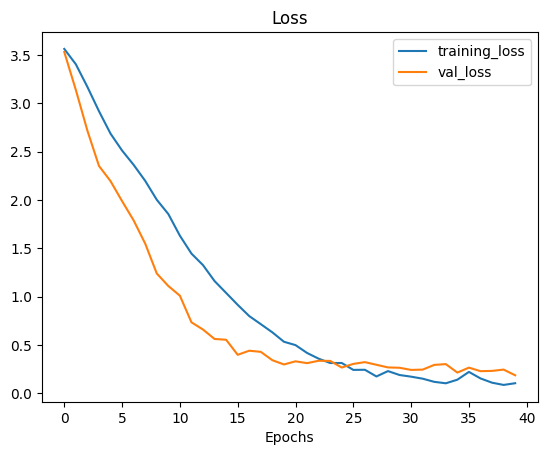

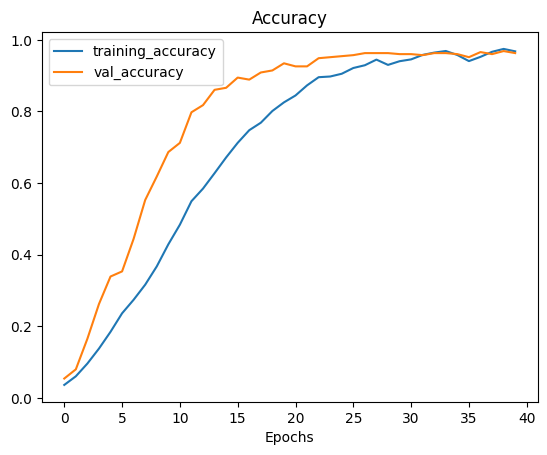

In [ ]:
# plot loss and accuracy
plot_loss_curves(Model_1_history)

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1.2 | <b></span><span style="color:#368F8B"><b>Making Prediction With Our Trained Model</b></span></span>

In [12]:
def load_and_pred_image(file_name,img_shape = 64, scale = True):
  image = tf.keras.preprocessing.image.load_img(file_name,target_size=(64,64))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.array([image])
  if scale:
    image = image/255.
  pred = Model_1.predict(image)
  result_index = np.argmax(pred)
  return class_names[result_index]

/content/test/eggplant/Image_2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
/content/test/chilli pepper/Image_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
/content/test/jalepeno/Image_2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


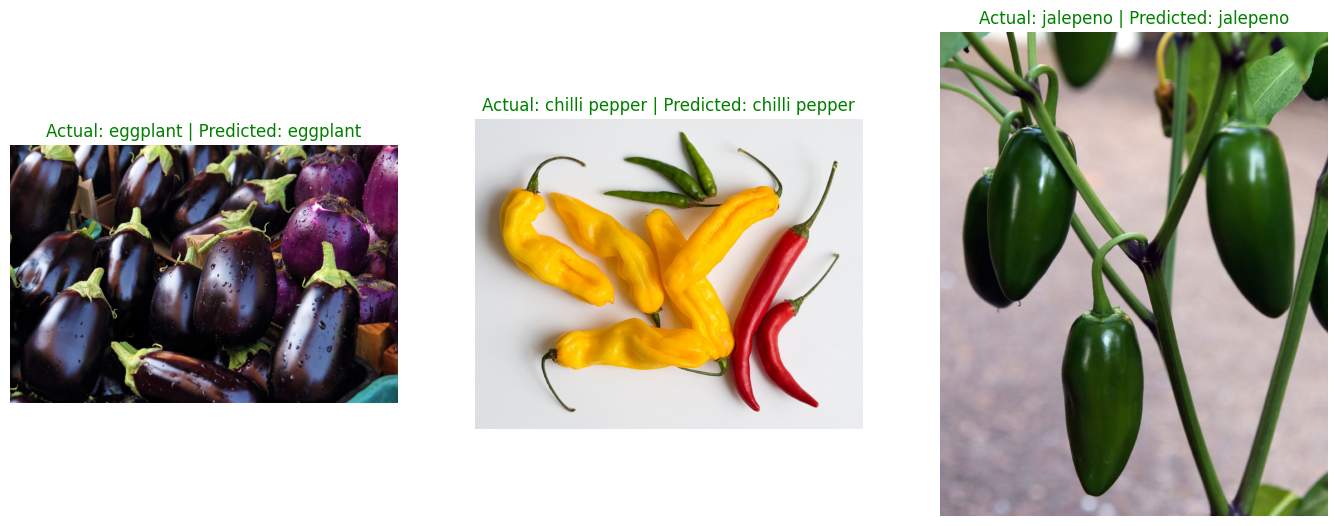

In [ ]:
import os
import random

test_dir = '/content/test/'

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename
  print(filepath)

  # Load and preprocess the image
  pred_image = load_and_pred_image(filepath, scale = True)
  img = mpimg.imread(filepath)

  # Plot the image
  plt.subplot(1, 3, i+1)
  plt.imshow(img / 255.)
  if class_name == pred_image:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='green')
  else:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='red')

  plt.axis("off")

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1.3 | <b></span><span style="color:#368F8B"><b>Saving the Model</b></span></span>

In [ ]:
Model_1.save("Model_1.h5")

In [ ]:
Model_1.save("my_model.keras")

!cp my_model.keras /content/drive/MyDrive/

In [ ]:
# saving the model at my google drive
# from google.colab import drive
# drive.mount('/content/drive')

# !cp Model_1.h5 /content/drive/MyDrive/

Mounted at /content/drive


## <a id='step31'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2 | <b></span><span style="color:#368F8B"><b>Add MobileNetV2 model</b></span></span>

In [52]:
from tensorflow.keras.applications import MobileNetV2

pretrained_model = MobileNetV2(
    input_shape=(64, 64, 3),   # input image size
    include_top=False,          # model not include top layer
    weights='imagenet',         # wights type
    pooling='avg'               # type of pooling layer
)

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.1 | <b></span><span style="color:#368F8B"><b>Freeze MobileNetV2 layers</b></span></span>

In [53]:
for layer in pretrained_model.layers:
  print(layer.name)

input_layer_12
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6

In [54]:
# freeze all layers except the last layers
pretrained_model.trainable = True
set_trainable = False

for layer in pretrained_model.layers:
  if layer.name == 'block_16_expand':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in pretrained_model.layers[-12:]:
  print(layer.name, layer.trainable)

block_16_expand True
block_16_expand_BN True
block_16_expand_relu True
block_16_depthwise True
block_16_depthwise_BN True
block_16_depthwise_relu True
block_16_project True
block_16_project_BN True
Conv_1 True
Conv_1_bn True
out_relu True
global_average_pooling2d_2 True


## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.2 | <b></span><span style="color:#368F8B"><b>Define the Model and Train it</b></span></span>

In [55]:
tf.random.set_seed(42)

Model_2 = tf.keras.Sequential([
    layers.Input(shape=(64, 64, 3)),
    pretrained_model,

    layers.Flatten(),
    layers.Dense(units = 512, activation = "relu"),
    layers.Dense(units = 256, activation = "relu"),
    layers.Dropout(0.5),

    layers.Dense(len(class_names), activation = 'softmax')
])
Model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
Model_2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,054,436 (11.65 MB)

 Trainable params: 1,682,532 (6.42 MB)

 Non-trainable params: 1,371,904 (5.23 MB)

In [56]:
# callbacks
checkpoint_path = "MyModel_2_MobileNetV2.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_best_only = True,
    save_weights_only = True,
    monitor = "val_accuracy",
    verbose = 1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",
    patience = 10,
    restore_best_weights = True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = "val_loss", factor = 0.5,
    patience = 3, min_lr = 1e-6
)

# train the Model
Model_2_history = Model_2.fit(
    training_set,
    epochs = 100,
    validation_data = validation_set,
    callbacks = [checkpoint_callback, early_stopping, reduce_lr],
)

Epoch 1/100
96/98 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step - accuracy: 0.1364 - loss: 3.4869
Epoch 1: val_accuracy improved from -inf to 0.16524, saving model to MyModel_2_MobileNetV2.weights.h5
98/98 ━━━━━━━━━━━━━━━━━━━━ 105s 923ms/step - accuracy: 0.1388 - loss: 3.4738 - val_accuracy: 0.1652 - val_loss: 7.0966 - learning_rate: 0.0010
Epoch 2/100
96/98 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step - accuracy: 0.4189 - loss: 2.1493
Epoch 2: val_accuracy improved from 0.16524 to 0.41311, saving model to MyModel_2_MobileNetV2.weights.h5
98/98 ━━━━━━━━━━━━━━━━━━━━ 133s 849ms/step - accuracy: 0.4191 - loss: 2.1482 - val_accuracy: 0.4131 - val_loss: 2.0740 - learning_rate: 0.0010
Epoch 3/100
95/98 ━━━━━━━━━━━━━━━━━━━━ 2s 786ms/step - accuracy: 0.5284 - loss: 1.7328
Epoch 3: val_accuracy did not improve from 0.41311
98/98 ━━━━━━━━━━━━━━━━━━━━ 91s 867ms/step - accuracy: 0.5285 - loss: 1.7318 - val_accuracy: 0.3647 - val_loss: 2.4724 - learning_rate: 0.0010
Epoch 4/100
96/98 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step 

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.3 | <b></span><span style="color:#368F8B"><b>Evaluate the Pretrained Model</b></span></span>

In [57]:
# Evaluate Model
from termcolor import colored

Model_2.load_weights('/content/MyModel_2_MobileNetV2.weights.h5')

train_loss, train_acc = Model_2.evaluate(training_set)
print(colored(f'Training accuracy: {round(train_acc, 3)}', 'green', attrs=['bold']))

val_loss, val_acc = Model_2.evaluate(validation_set)
print(colored(f'Training accuracy: {round(val_acc, 3)}', 'green', attrs=['bold']))

test_loss, test_acc = Model_2.evaluate(testing_set)
print(colored(f'Training accuracy: {round(test_acc, 3)}', 'green', attrs=['bold']))


98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 754ms/step - accuracy: 0.9878 - loss: 0.0279
Training accuracy: 0.987
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 837ms/step - accuracy: 0.9752 - loss: 0.1743
Training accuracy: 0.969
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9577 - loss: 0.2992
Training accuracy: 0.969


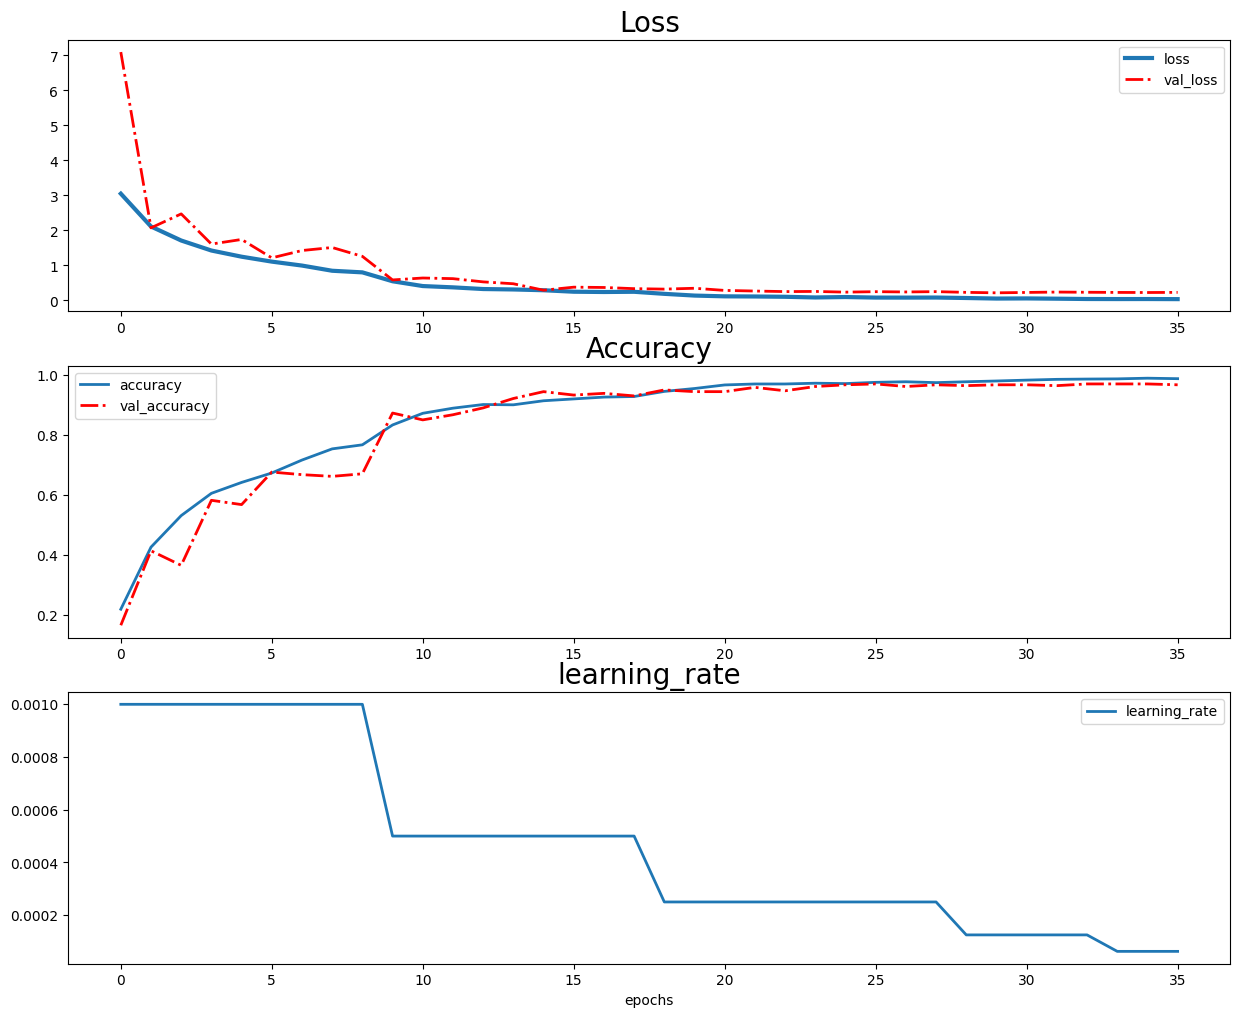

In [60]:
# plot the history
result_df = pd.DataFrame(Model_2_history.history)
x = np.arange(len(result_df))
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
#  AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend()

#  AX2 : Loss
ax[2].plot(x, result_df.learning_rate, label='learning_rate', linewidth=2)
ax[2].set_title('learning_rate', fontsize=20)
ax[2].set_xlabel('epochs')
ax[2].legend()


plt.sharex=True


plt.show()

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.4 | <b></span><span style="color:#368F8B"><b>Making Prediction with MobileNetV2 Pretrained Model</b></span></span>

/content/test/spinach/Image_6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
/content/test/soy beans/Image_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
/content/test/cauliflower/Image_2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


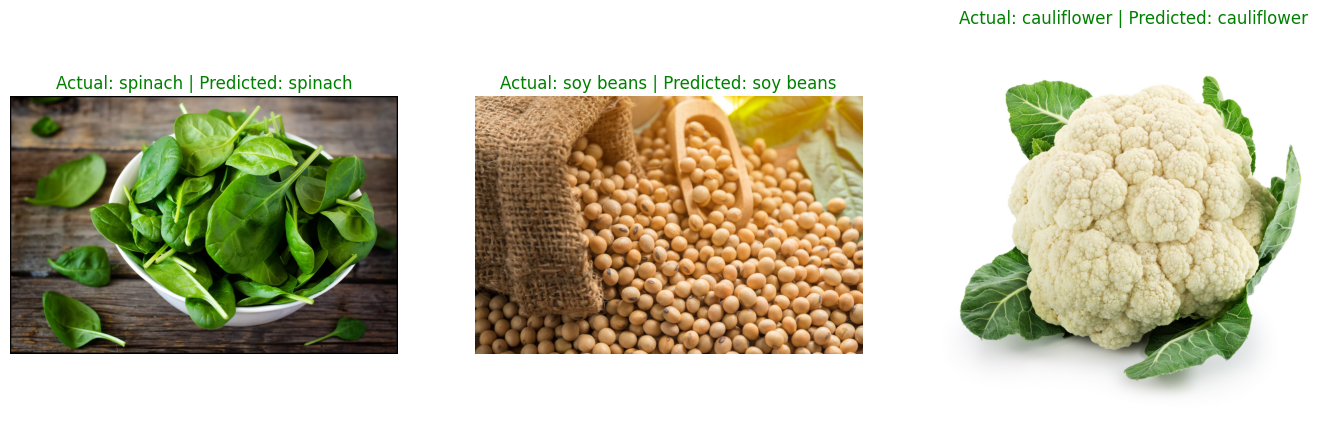

In [62]:
import os
import random

def load_and_pred_image(file_name,img_shape = 64, scale = True):
  image = tf.keras.preprocessing.image.load_img(file_name,target_size=(64,64))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.array([image])
  if scale:
    image = image/255.
  pred = Model_2.predict(image)
  result_index = np.argmax(pred)
  return class_names[result_index]

test_dir = '/content/test/'

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename
  print(filepath)

  # Load and preprocess the image
  pred_image = load_and_pred_image(filepath, scale = True)
  img = mpimg.imread(filepath)

  # Plot the image
  plt.subplot(1, 3, i+1)
  plt.imshow(img / 255.)
  if class_name == pred_image:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='green')
  else:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='red')

  plt.axis("off")

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.5 | <b></span><span style="color:#368F8B"><b>Saving the Pretrained Model</b></span></span>

In [64]:
Model_2.save("Model_2.h5")
Model_2.save("my_model_2.keras")

!cp my_model_2.keras /content/drive/MyDrive/

<a id="author"></a>
<div style="border:3px solid navy; border-radius:30px; padding: 15px; background-size: cover; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/sXwGWcwC/download.jpg); background-size: cover">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Abdelmoneim Mohamed</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/Xmen3em</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/abdelmoneimrehab</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : https://linkedin.com/in/abdelmoneim77</a></font></h6>


<img src="https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg">